# Theory

1. What is deep learning, and how is it connected to artificial intelligence?

--> Deep learning is a subset of machine learning (ML), which itself is a subset of artificial intelligence (AI).

It uses multi-layered neural networks to automatically learn complex patterns in large datasets.

2. What is a neural network, and what are the different types of neural networks?

--> A neural network mimics the human brain by connecting layers of nodes ("neurons").

Types: Feedforward Neural Networks (FNN), Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN), Generative Adversarial Networks (GANs).

3. What is the mathematical structure of a neural network?
--> It's a series of matrix multiplications and nonlinear activation functions:

y=f(Wx+b)

where 

W = weight matrix, 

x = input vector, 

b = bias vector, 

f = activation function.

4. What is an activation function, and why is it essential in neural network?

--> Activation functions introduce non-linearity to neural networks, enabling them to learn complex data patterns.

5. Could you list some common activation functions used in neural networks?

-->Common activation functions:

Sigmoid

Tanh

ReLU (Rectified Linear Unit)

Leaky ReLU

Softmax


6. What is a multilayer neural network?

--> A neural network with one or more hidden layers between the input and output layers.



7. What is a loss function, and why is it crucial for neural network training?

--> The loss function measures the difference between predicted and true outputs.

It helps the model adjust its weights during training (optimization).


8. What are some common types of loss functions?

--> Common loss functions:
Mean Squared Error (MSE)

Cross-Entropy Loss

Hinge Loss

9. How does a neural network learn?

--> Through forward propagation (calculating predictions) and backward propagation (adjusting weights via gradients).

10. What is an optimizer in neural networks, and why is it necessary?

--> An optimizer updates the model parameters (weights) to minimize the loss function during training.


11. Could you briefly describe some common optimizers?

--> Common optimizers:

Stochastic Gradient Descent (SGD)

Adam

RMSprop

Adagrad

12. Can you explain forward and backward propagation in a neural network?

--> Forward and Backward Propagation:

Forward: Compute output based on input and weights.

Backward: Compute gradient of loss w.r.t weights using chain rule, and update weights.


13. What is weight initialization, and how does it impact training?

--> Good initialization prevents vanishing or exploding gradients and accelerates convergence.


14. What is the vanishing gradient problem in deep learning?

--> Gradients become very small, making it hard for weights to update, slowing learning.

15. What is the exploding gradient problem?

--> Gradients grow very large, causing unstable updates and often NaNs during training.


# Practical


In [2]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


1. How do you create a simple perceptron for basic binary classification?



In [3]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model = Sequential([
    Dense(1, input_dim = 2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])   

model.fit(x, y, epochs=10, verbose=0)
predictions = model.predict(x) 
print(f'predictions: {predictions}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predictions: [[0.49750385]
 [0.60676855]
 [0.59126794]
 [0.6927363 ]]


2. How can you build a neural network with one hidden layer using Keras?



In [4]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model = Sequential([
    Dense(10, input_dim = 2, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=10, verbose=0)   
predictions = model.predict(x)
print(f'predictions: {predictions}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
predictions: [[0.5102428]
 [0.4321412]
 [0.5491468]
 [0.4812869]]


3. How do you initialize weights using the Xavier (Glorot) initialization method in Keras?



In [5]:
from keras.initializers import glorot_uniform

model = Sequential([
    Dense(4, input_dim = 2, activation='tanh',kernel_initializer='glorot_uniform'),
    Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=10, verbose=0)   
predictions = model.predict(x)
print(f'predictions: {predictions}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
predictions: [[0.4943534]
 [0.5652811]
 [0.5262668]
 [0.5734663]]


4. How can you apply different activation functions in a neural network in Keras?



In [6]:
model = Sequential([
    Dense(4, input_dim = 2, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=10, verbose=0)   
predictions = model.predict(x)
print(f'predictions: {predictions}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
predictions: [[0.5052666 ]
 [0.48209274]
 [0.44748908]
 [0.4429212 ]]


5. How do you add dropout to a neural network model to prevent overfitting?



In [7]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(10, input_dim = 2, activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=10, verbose=0)   
predictions = model.predict(x)
print(f'predictions: {predictions}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
predictions: [[0.5007052 ]
 [0.5674427 ]
 [0.54149234]
 [0.40510643]]


6. How do you manually implement forward propagation in a simple neural network?


In [8]:
def sigmoid(x):
    return 1/1+np.exp(-x)

w = np.array([-0.5,0.6])
b = 0.5
x = np.array([0,1])

z = np.dot(w,x) + b
a = sigmoid(z)
print(a)


1.3328710836980795



7. How do you add batch normalization to a neural network model in Keras?



In [9]:
from keras.layers import BatchNormalization

x = np.array([[0,0], [0,1], [1,0], [1,1]])   # shape = (4,2)
y = np.array([0,1,1,0])                      # shape = (4,)

model = Sequential([
    Dense(10, input_dim=2, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now fit will work because x and y both have 4 samples
model.fit(x, y, epochs=5, verbose=0)

predictions = model.predict(x)
print(f'Predictions: {predictions}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predictions: [[0.49861044]
 [0.23798427]
 [0.52507675]
 [0.32297418]]


8. How can you visualize the training process with accuracy and loss curves?



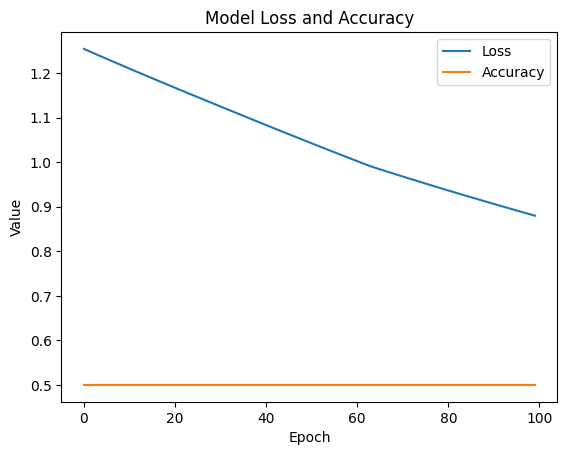

In [10]:

history = model.fit(x, y, epochs=100, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss and Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()


9. How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients?



In [11]:
optimizer = Adam(clipvalue=1.0)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

10. How can you create a custom loss function in Keras?



In [12]:
from keras import backend as K
def custom_loss(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))  

model.compile(optimizer=optimizer, loss=custom_loss, metrics=['accuracy'])  


11. How can you visualize the structure of a neural network model in Keras?

In [14]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
